In [3]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
%pylab inline
from collections import Counter
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [31]:
train = pd.read_csv("train_starting.csv")
test = pd.read_csv("test_starting.csv")

In [5]:
train.columns

Index([u'Unnamed: 0', u'id', u'date_account_created',
       u'timestamp_first_active', u'date_first_booking', u'gender', u'age',
       u'signup_method', u'signup_flow', u'language', u'affiliate_channel',
       u'affiliate_provider', u'first_affiliate_tracked', u'signup_app',
       u'first_device_type', u'first_browser', u'country_destination',
       u'lag_account_created', u'lag_first_active',
       u'lag_account_created_first_active', u'bookings',
       u'population_in_thousands', u'sum_secs_elapsed', u'counts'],
      dtype='object')

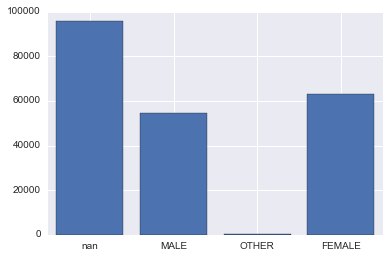

In [6]:
c1 = Counter(train.gender).keys()
c2 = Counter(train.gender).values()
plt.bar(range(len(c1)), c2, align = 'center')
plt.xticks(range(len(c1)), c1)
plt.figure(figsize=(30, 30))

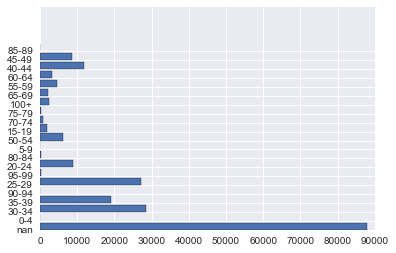

In [7]:
c1 = Counter(train.age).keys()
c2 = Counter(train.age).values()
plt.barh(range(len(c1)), c2)
#plt.xticks(range(len(c1)), c1)
plt.yticks(range(len(c1)), c1)
plt.figure(figsize=(30, 30))

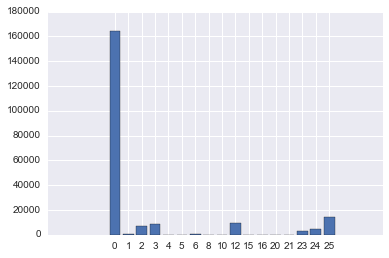

In [8]:
c1 = Counter(train.signup_flow).keys()
c2 = Counter(train.signup_flow).values()
plt.bar(range(len(c1)), c2, align = 'center')
plt.xticks(range(len(c1)), c1)
#plt.yticks(range(len(c1)), c1)
plt.figure(figsize=(30, 30))

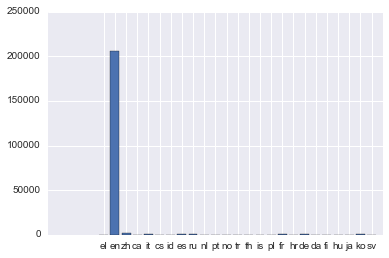

In [9]:
c1 = Counter(train.language).keys()
c2 = Counter(train.language).values()
plt.bar(range(len(c1)), c2, align = 'center')
plt.xticks(range(len(c1)), c1)
#plt.yticks(range(len(c1)), c1)
plt.figure(figsize=(30, 30))

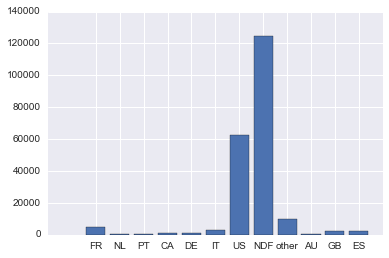

In [10]:
c1 = Counter(train.country_destination).keys()
c2 = Counter(train.country_destination).values()
plt.bar(range(len(c1)), c2, align = 'center')
plt.xticks(range(len(c1)), c1)
#plt.yticks(range(len(c1)), c1)
plt.figure(figsize=(30, 30))

Gender as a function of destination
Age as a functino of country (stacked bar graph)
Same for lag variables

In [11]:
x = randint(0, 100, 10)
y = randint(0, 100, 10)
width = .35

In [12]:
sex_age = train[['gender', 'age', 'id']].groupby(by = ['gender', 'age'])

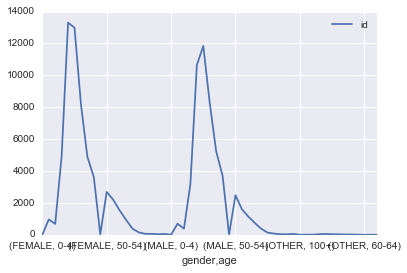

In [13]:
sex_age.count().plot(y = 'id')

In [14]:
#Distribution of date of account created minus date of first booking

In [15]:
train.head()

,Unnamed: 0,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,first_device_type,first_browser,country_destination,lag_account_created,lag_first_active,lag_account_created_first_active,bookings,population_in_thousands,sum_secs_elapsed,counts
0,0,gxn3p5htnn,2010-06-28 00:00:00,2009-03-19 04:32:55,NaN,NaN,NaN,facebook,0,en,...,Mac Desktop,Chrome,NDF,NB,NB,greater 1 day,NB,NB,NaN,NaN
1,1,820tgsjxq7,2011-05-25 00:00:00,2009-05-23 17:48:09,NaN,MALE,35-39,facebook,0,en,...,Mac Desktop,Chrome,NDF,NB,NB,greater 1 day,NB,NB,NaN,NaN
2,2,4ft3gnwmtx,2010-09-28 00:00:00,2009-06-09 23:12:47,2010-08-02 00:00:00,FEMALE,55-59,basic,3,en,...,Windows Desktop,IE,US,before,greater 1 day,greater 1 day,waited,11264.0,NaN,NaN
3,3,bjjt8pjhuk,2011-12-05 00:00:00,2009-10-31 06:01:29,2012-09-08 00:00:00,FEMALE,40-44,facebook,0,en,...,Mac Desktop,Firefox,other,greater 1 day,greater 1 day,greater 1 day,waited,2458.8000000000002,NaN,NaN
4,4,87mebub9p4,2010-09-14 00:00:00,2009-12-08 06:11:05,2010-02-18 00:00:00,NaN,40-44,basic,0,en,...,Mac Desktop,Chrome,US,before,greater 1 day,greater 1 day,waited,NaN,NaN,NaN


In [16]:
type(train.date_first_booking[3])

str

In [17]:
train.date_account_created = pd.to_datetime(train.date_account_created)
train.timestamp_first_active = pd.to_datetime(train.timestamp_first_active)
train.date_first_booking = pd.to_datetime(train.date_first_booking)
#Gender?

In [19]:
(train.date_first_booking - train.date_account_created).astype(int)

0        -9223372036854775808
1        -9223372036854775808
2           -4924800000000000
3           24019200000000000
4          -17971200000000000
5              86400000000000
6             259200000000000
7             864000000000000
8           17798400000000000
9                           0
10            172800000000000
11       -9223372036854775808
12           1123200000000000
13       -9223372036854775808
14       -9223372036854775808
15             86400000000000
16       -9223372036854775808
17            172800000000000
18       -9223372036854775808
19                          0
20            691200000000000
21             86400000000000
22                          0
23       -9223372036854775808
24       -9223372036854775808
25            259200000000000
26       -9223372036854775808
27            864000000000000
28                          0
29            518400000000000
                 ...         
213421   -9223372036854775808
213422   -9223372036854775808
213423   -

In [21]:
x = (train.date_first_booking - train.date_account_created)

In [22]:
y = x.apply(lambda x: x if pd.isnull(x) else x.days)

In [25]:
y

0          NaT
1          NaT
2          -57
3          278
4         -208
5            1
6            3
7           10
8          206
9            0
10           2
11         NaT
12          13
13         NaT
14         NaT
15           1
16         NaT
17           2
18         NaT
19           0
20           8
21           1
22           0
23         NaT
24         NaT
25           3
26         NaT
27          10
28           0
29           6
          ... 
213421     NaT
213422     NaT
213423     NaT
213424     NaT
213425     NaT
213426     NaT
213427     NaT
213428     NaT
213429     NaT
213430     NaT
213431     NaT
213432     NaT
213433     NaT
213434     NaT
213435     NaT
213436     NaT
213437     NaT
213438     NaT
213439     259
213440     NaT
213441      44
213442     NaT
213443      13
213444     NaT
213445       2
213446     NaT
213447     NaT
213448     NaT
213449     NaT
213450     NaT
dtype: object

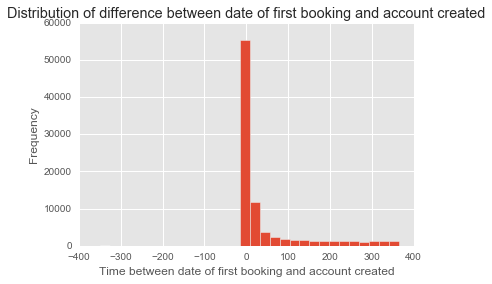

In [28]:
plt.style.use('ggplot')
y.hist(bins = 30)
plt.xlabel('Time between date of first booking and account created')
plt.ylabel('Frequency')
plt.title('Distribution of difference between date of first booking and account created')

In [ ]:
Counter(y)[pd.NaT]

In [29]:
train.shape

(213451, 24)

In [30]:
train.date_account_created

0        2010-06-28
1        2011-05-25
2        2010-09-28
3        2011-12-05
4        2010-09-14
5        2010-01-01
6        2010-01-02
7        2010-01-03
8        2010-01-04
9        2010-01-04
10       2010-01-04
11       2010-01-05
12       2010-01-05
13       2010-01-05
14       2010-01-07
15       2010-01-07
16       2010-01-07
17       2010-01-07
18       2010-01-08
19       2010-01-10
20       2010-01-10
21       2010-01-10
22       2010-01-11
23       2010-01-11
24       2010-01-11
25       2010-01-12
26       2010-01-12
27       2010-01-12
28       2010-01-13
29       2010-01-13
            ...    
213421   2014-06-30
213422   2014-06-30
213423   2014-06-30
213424   2014-06-30
213425   2014-06-30
213426   2014-06-30
213427   2014-06-30
213428   2014-06-30
213429   2014-06-30
213430   2014-06-30
213431   2014-06-30
213432   2014-06-30
213433   2014-06-30
213434   2014-06-30
213435   2014-06-30
213436   2014-06-30
213437   2014-06-30
213438   2014-06-30
213439   2014-06-30


In [32]:
test.date_account_created

0        2014-07-01 00:00:00
1        2014-07-01 00:00:00
2        2014-07-01 00:00:00
3        2014-07-01 00:00:00
4        2014-07-01 00:00:00
5        2014-07-01 00:00:00
6        2014-07-01 00:00:00
7        2014-07-01 00:00:00
8        2014-07-01 00:00:00
9        2014-07-01 00:00:00
10       2014-07-01 00:00:00
11       2014-07-01 00:00:00
12       2014-07-01 00:00:00
13       2014-07-01 00:00:00
14       2014-07-01 00:00:00
15       2014-07-01 00:00:00
16       2014-07-01 00:00:00
17       2014-07-01 00:00:00
18       2014-07-01 00:00:00
19       2014-07-01 00:00:00
20       2014-07-01 00:00:00
21       2014-07-01 00:00:00
22       2014-07-01 00:00:00
23       2014-07-01 00:00:00
24       2014-07-01 00:00:00
25       2014-07-01 00:00:00
26       2014-07-01 00:00:00
27       2014-07-01 00:00:00
28       2014-07-01 00:00:00
29       2014-07-01 00:00:00
                ...         
62066    2014-09-30 00:00:00
62067    2014-09-30 00:00:00
62068    2014-09-30 00:00:00
62069    2014-